In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import numpy as np

# loss_rate

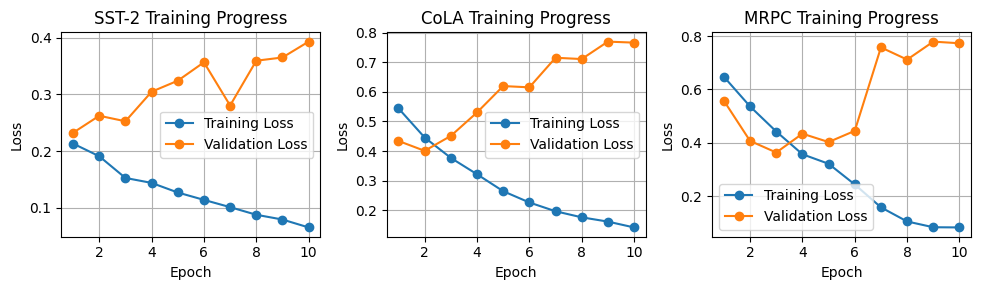

In [4]:
# 資料集
data_sst2 = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.213300	0.232309	0.907110
2	0.191000	0.262281	0.912844
3	0.152800	0.252560	0.915138
4	0.144100	0.304570	0.908257
5	0.127200	0.323966	0.922018
6	0.114200	0.356372	0.904817
7	0.101400	0.280321	0.920872
8	0.088000	0.359161	0.910550
9	0.079600	0.364881	0.916284
10	0.065700	0.392781	0.910550
"""

data_cola = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.544300	0.434040	0.506019
2	0.445700	0.400614	0.574317
3	0.376700	0.451069	0.528880
4	0.321400	0.530368	0.539041
5	0.264100	0.619709	0.520633
6	0.225900	0.615376	0.568367
7	0.196200	0.715490	0.526665
8	0.175700	0.711065	0.532507
9	0.161200	0.770028	0.530857
10	0.141500	0.766623	0.545036
"""

data_mrpc = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.647500	0.557715	0.713235	0.818605
2	0.536400	0.407427	0.803922	0.863946
3	0.442600	0.363954	0.857843	0.897163
4	0.357500	0.434434	0.838235	0.890728
5	0.321800	0.403140	0.843137	0.883212
6	0.244400	0.445035	0.823529	0.868132
7	0.158800	0.757395	0.821078	0.879339
8	0.105900	0.711670	0.833333	0.881944
9	0.084300	0.778979	0.830882	0.882852
10	0.083600	0.772845	0.833333	0.883162
"""

# 轉換成DataFrame
df_sst2 = pd.read_csv(StringIO(data_sst2), delim_whitespace=True)
df_cola = pd.read_csv(StringIO(data_cola), delim_whitespace=True)
df_mrpc = pd.read_csv(StringIO(data_mrpc), delim_whitespace=True)

# 資料集標籤
labels = ['SST-2', 'CoLA', 'MRPC']

# 繪製折線圖
plt.figure(figsize=(10, 3))

# SST-2
plt.subplot(1, 3, 1)
plt.plot(df_sst2['Epoch'], df_sst2['Training_Loss'], label='Training Loss', marker='o')
plt.plot(df_sst2['Epoch'], df_sst2['Validation_Loss'], label='Validation Loss', marker='o')
plt.title('SST-2 Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# CoLA
plt.subplot(1, 3, 2)
plt.plot(df_cola['Epoch'], df_cola['Training_Loss'], label='Training Loss', marker='o')
plt.plot(df_cola['Epoch'], df_cola['Validation_Loss'], label='Validation Loss', marker='o')
plt.title('CoLA Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# MRPC
plt.subplot(1, 3, 3)
plt.plot(df_mrpc['Epoch'], df_mrpc['Training_Loss'], label='Training Loss', marker='o')
plt.plot(df_mrpc['Epoch'], df_mrpc['Validation_Loss'], label='Validation Loss', marker='o')
plt.title('MRPC Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# PEFT(bitfit)

## sst2

In [33]:
# 資料集
data_sst2 = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.567000	0.345414	0.864679
2	0.318400	0.282223	0.901376
3	0.287700	0.265837	0.915138
4	0.268300	0.268860	0.908257
5	0.265000	0.257000	0.912844
"""
data_sst2_lr = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.752800	0.712086	0.477064
2	0.700200	0.680094	0.573394
3	0.684800	0.671184	0.564220
4	0.678700	0.666530	0.584862
5	0.678900	0.665060	0.589450
"""

data_sst2_finetune = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.427100	0.259497	0.885057
2	0.256200	0.156745	0.954023
3	0.170900	0.304329	0.896552
4	0.107600	0.254708	0.931034
5	0.073800	0.333233	0.919540
"""

# 轉換成DataFrame
df_sst2 = pd.read_csv(StringIO(data_sst2), delim_whitespace=True)
df_sst2_lr = pd.read_csv(StringIO(data_sst2_lr), delim_whitespace=True)
df_sst2_fintune = pd.read_csv(StringIO(data_sst2_finetune), delim_whitespace=True)

# 計算每個模型的平均值
avg_sst2 = df_sst2[['Accuracy']].mean()
avg_sst2_lr = df_sst2[['Accuracy']].mean()
avg_sst2_finetune = df_sst2[['Accuracy']].mean()

## cola

In [34]:
# 資料集
data_cola = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.579900	0.518015	0.380333
2	0.511900	0.457570	0.509659
3	0.449600	0.535753	0.431873
4	0.426100	0.487779	0.483757
5	0.408300	0.476270	0.515291
"""

data_cola_lr = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.697900	0.676171	-0.090451
2	0.631200	0.632188	0.000000
3	0.613500	0.623572	0.000000
4	0.613800	0.620722	0.000000
5	0.619900	0.619955	0.000000
"""

data_cola_finetune = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.523500	0.487015	0.461338
2	0.408500	0.421025	0.568367
3	0.265500	0.498915	0.567605
4	0.220400	0.710624	0.541659
5	0.172300	0.727704	0.562907
"""

# 轉換成DataFrame
df_cola = pd.read_csv(StringIO(data_cola), delim_whitespace=True)
df_cola_lr = pd.read_csv(StringIO(data_cola_lr), delim_whitespace=True)
df_cola_fintune = pd.read_csv(StringIO(data_cola_finetune), delim_whitespace=True)

# 計算每個模型的平均值
avg_cola = df_cola[['Matthews_Correlation']].mean()
avg_cola_lr = df_cola_lr[['Matthews_Correlation']].mean()
avg_cola_finetune = df_cola_fintune[['Matthews_Correlation']].mean()

## mrpc

In [35]:
# 資料集
data_mrpc = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.709800	0.619579	0.683824	0.812227
2	0.598900	0.542391	0.700980	0.820059
3	0.570200	0.525442	0.784314	0.855738
4	0.540100	0.508603	0.789216	0.858553
5	0.524200	0.507368	0.794118	0.862295
"""

data_mrpc_lr = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.730400	0.722377	0.316176	0.000000
2	0.729400	0.717585	0.316176	0.000000
3	0.723300	0.710619	0.318627	0.007143
4	0.708900	0.704060	0.316176	0.091205
5	0.709200	0.700886	0.328431	0.189349
"""

data_mrpc_finetune = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.701800	0.582835	0.683824	0.812227
2	0.525800	0.496472	0.774510	0.855799
3	0.397900	0.396778	0.840686	0.886562
4	0.227600	0.466933	0.845588	0.892675
5	0.164400	0.510191	0.850490	0.895369
"""

# 轉換成DataFrame
df_mrpc = pd.read_csv(StringIO(data_mrpc), delim_whitespace=True)
df_mrpc_lr = pd.read_csv(StringIO(data_mrpc_lr), delim_whitespace=True)
df_mrpc_finetune = pd.read_csv(StringIO(data_mrpc_finetune), delim_whitespace=True)

# 計算每個模型的平均值
avg_mrpc = df_mrpc[['Accuracy', 'F1']].mean()
avg_mrpc_lr = df_mrpc_lr[['Accuracy', 'F1']].mean()
avg_mrpc_finetune = df_mrpc_finetune[['Accuracy', 'F1']].mean()

## compare

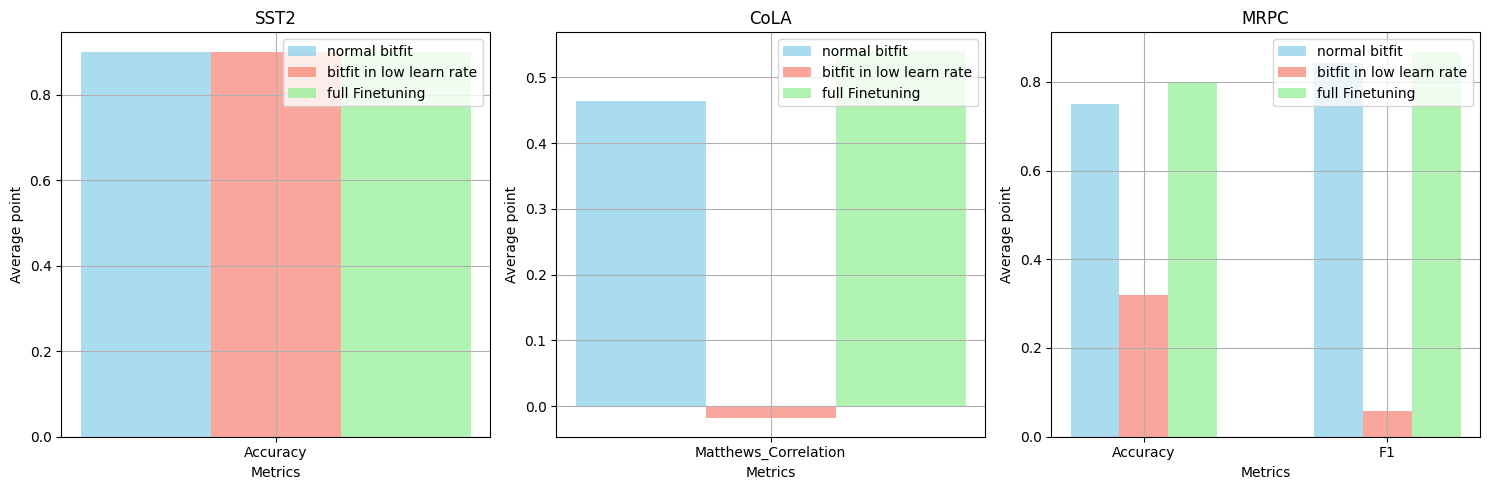

In [40]:
# 繪製柱狀圖
plt.figure(figsize=(15, 5))

# SST2
plt.subplot(1, 3, 1)
bar_width = 0.2
index = range(len(avg_sst2))
plt.bar(index, avg_sst2, bar_width, label='normal bitfit', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_sst2_lr, bar_width, label='bitfit in low learn rate', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_sst2_finetune, bar_width, label='full Finetuning', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('SST2')
plt.xticks([i + bar_width for i in index], avg_sst2.index)
plt.legend()
plt.grid(True)

# CoLA
plt.subplot(1, 3, 2)
bar_width = 0.2
index = range(len(avg_cola))
plt.bar(index, avg_cola, bar_width, label='normal bitfit', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_cola_lr, bar_width, label='bitfit in low learn rate', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_cola_finetune, bar_width, label='full Finetuning', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('CoLA')
plt.xticks([i + bar_width for i in index], avg_cola.index)
plt.legend()
plt.grid(True)

# MRPC
plt.subplot(1, 3, 3)
bar_width = 0.2
index = range(len(avg_mrpc))
plt.bar(index, avg_mrpc, bar_width, label='normal bitfit', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_mrpc_lr, bar_width, label='bitfit in low learn rate', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_mrpc_finetune, bar_width, label='full Finetuning', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('MRPC')
plt.xticks([i + bar_width for i in index], avg_mrpc.index)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Lora

## SST2

In [45]:
# 資料集
data_sst2_r8 = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.470200	0.241471	0.896552
2	0.277600	0.228126	0.896552
3	0.216800	0.315291	0.896552
4	0.175600	0.310487	0.908046
5	0.152700	0.312068	0.896552
"""
data_sst2_r16 = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.473200	0.219625	0.908046
2	0.278700	0.229023	0.896552
3	0.216000	0.270584	0.896552
4	0.175800	0.286730	0.885057
5	0.153600	0.287856	0.896552
"""

data_sst2_r32 = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.427100	0.259497	0.885057
2	0.256200	0.156745	0.954023
3	0.170900	0.304329	0.896552
4	0.107600	0.254708	0.931034
5	0.073800	0.333233	0.919540
"""

# 轉換成DataFrame
df_sst2_r8 = pd.read_csv(StringIO(data_sst2_r8), delim_whitespace=True)
df_sst2_r16 = pd.read_csv(StringIO(data_sst2_r16), delim_whitespace=True)
df_sst2_r32 = pd.read_csv(StringIO(data_sst2_r32), delim_whitespace=True)

# 計算每個模型的平均值
avg_sst2_r8 = df_sst2_r8[['Accuracy']].mean()
avg_sst2_r16 = df_sst2_r16[['Accuracy']].mean()
avg_sst2_r32 = df_sst2_r32[['Accuracy']].mean()

## CoLA

In [46]:
# 資料集
data_cola_r8 = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.489100	0.427919	0.538214
2	0.425500	0.430109	0.525929
3	0.350100	0.436294	0.557342
4	0.279300	0.625019	0.543489
5	0.215600	0.526561	0.577918
"""

data_cola_r16 = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.493600	0.437441	0.481388
2	0.424000	0.407167	0.568063
3	0.351100	0.441147	0.549703
4	0.277000	0.575386	0.554729
5	0.204300	0.542320	0.565087
"""

data_cola_r32 = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.493000	0.445185	0.510249
2	0.422400	0.441233	0.510032
3	0.351100	0.426241	0.577794
4	0.270100	0.558046	0.550291
5	0.202200	0.540960	0.605713
"""

# 轉換成DataFrame
df_cola_r8 = pd.read_csv(StringIO(data_cola_r8), delim_whitespace=True)
df_cola_r16 = pd.read_csv(StringIO(data_cola_r16), delim_whitespace=True)
df_cola_r32 = pd.read_csv(StringIO(data_cola_r32), delim_whitespace=True)

# 計算每個模型的平均值
avg_cola_r8 = df_cola_r8[['Matthews_Correlation']].mean()
avg_cola_r16 = df_cola_r16[['Matthews_Correlation']].mean()
avg_cola_r32 = df_cola_r32[['Matthews_Correlation']].mean()

## MRPC

In [47]:
# 資料集
data_mrpc_r8 = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.647600	0.550347	0.737745	0.830964
2	0.502800	0.397069	0.830882	0.881239
3	0.414700	0.353348	0.850490	0.888073
4	0.316800	0.330763	0.867647	0.905594
5	0.270800	0.354508	0.875000	0.910369
"""

data_mrpc_r16 = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.647600	0.548460	0.742647	0.833597
2	0.505600	0.432773	0.818627	0.876254
3	0.414400	0.357527	0.840686	0.879852
4	0.320600	0.347632	0.857843	0.897887
5	0.267900	0.367416	0.877451	0.911348
"""

data_mrpc_r32 = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.647700	0.549973	0.732843	0.827258
2	0.503600	0.396431	0.825980	0.878632
3	0.417700	0.357400	0.833333	0.874539
4	0.317200	0.332763	0.852941	0.893993
5	0.266100	0.352976	0.862745	0.901060
"""

# 轉換成DataFrame
df_mrpc_r8 = pd.read_csv(StringIO(data_mrpc_r8), delim_whitespace=True)
df_mrpc_r16 = pd.read_csv(StringIO(data_mrpc_r16), delim_whitespace=True)
df_mrpc_r32 = pd.read_csv(StringIO(data_mrpc_r32), delim_whitespace=True)

# 計算每個模型的平均值
avg_mrpc_r8 = df_mrpc_r8[['Accuracy', 'F1']].mean()
avg_mrpc_r16 = df_mrpc_r16[['Accuracy', 'F1']].mean()
avg_mrpc_r32 = df_mrpc_r32[['Accuracy', 'F1']].mean()

## Compare

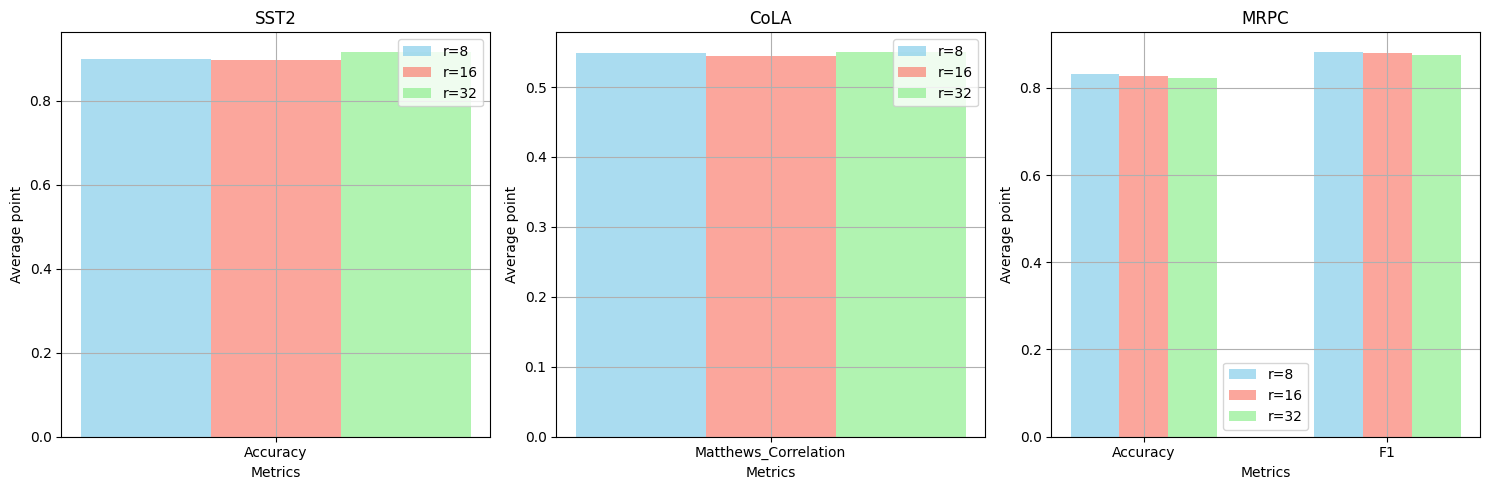

In [48]:
# 繪製柱狀圖
plt.figure(figsize=(15, 5))

# SST2
plt.subplot(1, 3, 1)
bar_width = 0.2
index = range(len(avg_sst2_r8))
plt.bar(index, avg_sst2_r8, bar_width, label='r=8', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_sst2_r16, bar_width, label='r=16', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_sst2_r32, bar_width, label='r=32', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('SST2')
plt.xticks([i + bar_width for i in index], avg_sst2_r8.index)
plt.legend()
plt.grid(True)

# CoLA
plt.subplot(1, 3, 2)
bar_width = 0.2
index = range(len(avg_cola_r8))
plt.bar(index, avg_cola_r8, bar_width, label='r=8', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_cola_r16, bar_width, label='r=16', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_cola_r32, bar_width, label='r=32', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('CoLA')
plt.xticks([i + bar_width for i in index], avg_cola_r8.index)
plt.legend()
plt.grid(True)

# MRPC
plt.subplot(1, 3, 3)
bar_width = 0.2
index = range(len(avg_mrpc_r8))
plt.bar(index, avg_mrpc_r8, bar_width, label='r=8', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_mrpc_r16, bar_width, label='r=16', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_mrpc_r32, bar_width, label='r=32', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('MRPC')
plt.xticks([i + bar_width for i in index], avg_mrpc_r8.index)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Lora & bitfit

## SST2

In [2]:
# 資料集
data_sst2 = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.567000	0.345414	0.864679
2	0.318400	0.282223	0.901376
3	0.287700	0.265837	0.915138
4	0.268300	0.268860	0.908257
5	0.265000	0.257000	0.912844
"""

data_sst2_r8 = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.470200	0.241471	0.896552
2	0.277600	0.228126	0.896552
3	0.216800	0.315291	0.896552
4	0.175600	0.310487	0.908046
5	0.152700	0.312068	0.896552
"""

data_sst2_finetune = """
Epoch	Training_Loss	Validation_Loss	Accuracy
1	0.427100	0.259497	0.885057
2	0.256200	0.156745	0.954023
3	0.170900	0.304329	0.896552
4	0.107600	0.254708	0.931034
5	0.073800	0.333233	0.919540
"""

# 轉換成DataFrame
df_sst2 = pd.read_csv(StringIO(data_sst2), delim_whitespace=True)
df_sst2_r8 = pd.read_csv(StringIO(data_sst2_r8), delim_whitespace=True)
df_sst2_fintune = pd.read_csv(StringIO(data_sst2_finetune), delim_whitespace=True)

# 計算每個模型的平均Rouge值
avg_sst2 = df_sst2[['Accuracy']].mean()
avg_sst2_r8 = df_sst2_r8[['Accuracy']].mean()
avg_sst2_finetune = df_sst2[['Accuracy']].mean()

## CoLA

In [3]:
# 資料集
data_cola = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.579900	0.518015	0.380333
2	0.511900	0.457570	0.509659
3	0.449600	0.535753	0.431873
4	0.426100	0.487779	0.483757
5	0.408300	0.476270	0.515291
"""

data_cola_r8 = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.489100	0.427919	0.538214
2	0.425500	0.430109	0.525929
3	0.350100	0.436294	0.557342
4	0.279300	0.625019	0.543489
5	0.215600	0.526561	0.577918
"""

data_cola_finetune = """
Epoch	Training_Loss	Validation_Loss	Matthews_Correlation
1	0.523500	0.487015	0.461338
2	0.408500	0.421025	0.568367
3	0.265500	0.498915	0.567605
4	0.220400	0.710624	0.541659
5	0.172300	0.727704	0.562907
"""

# 轉換成DataFrame
df_cola = pd.read_csv(StringIO(data_cola), delim_whitespace=True)
df_cola_r8 = pd.read_csv(StringIO(data_cola_r8), delim_whitespace=True)
df_cola_fintune = pd.read_csv(StringIO(data_cola_finetune), delim_whitespace=True)

# 計算每個模型的平均Rouge值
avg_cola = df_cola[['Matthews_Correlation']].mean()
avg_cola_r8 = df_cola_r8[['Matthews_Correlation']].mean()
avg_cola_finetune = df_cola_fintune[['Matthews_Correlation']].mean()


## MRPC

In [4]:
# 資料集
data_mrpc = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.709800	0.619579	0.683824	0.812227
2	0.598900	0.542391	0.700980	0.820059
3	0.570200	0.525442	0.784314	0.855738
4	0.540100	0.508603	0.789216	0.858553
5	0.524200	0.507368	0.794118	0.862295
"""

data_mrpc_r8 = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.647600	0.550347	0.737745	0.830964
2	0.502800	0.397069	0.830882	0.881239
3	0.414700	0.353348	0.850490	0.888073
4	0.316800	0.330763	0.867647	0.905594
5	0.270800	0.354508	0.875000	0.910369
"""

data_mrpc_finetune = """
Epoch	Training_Loss	Validation_Loss	Accuracy	F1
1	0.701800	0.582835	0.683824	0.812227
2	0.525800	0.496472	0.774510	0.855799
3	0.397900	0.396778	0.840686	0.886562
4	0.227600	0.466933	0.845588	0.892675
5	0.164400	0.510191	0.850490	0.895369
"""

# 轉換成DataFrame
df_mrpc = pd.read_csv(StringIO(data_mrpc), delim_whitespace=True)
df_mrpc_r8 = pd.read_csv(StringIO(data_mrpc_r8), delim_whitespace=True)
df_mrpc_finetune = pd.read_csv(StringIO(data_mrpc_finetune), delim_whitespace=True)

# 計算每個模型的平均值
avg_mrpc = df_mrpc[['Accuracy', 'F1']].mean()
avg_mrpc_r8 = df_mrpc_r8[['Accuracy', 'F1']].mean()
avg_mrpc_finetune = df_mrpc_finetune[['Accuracy', 'F1']].mean()

## Compare

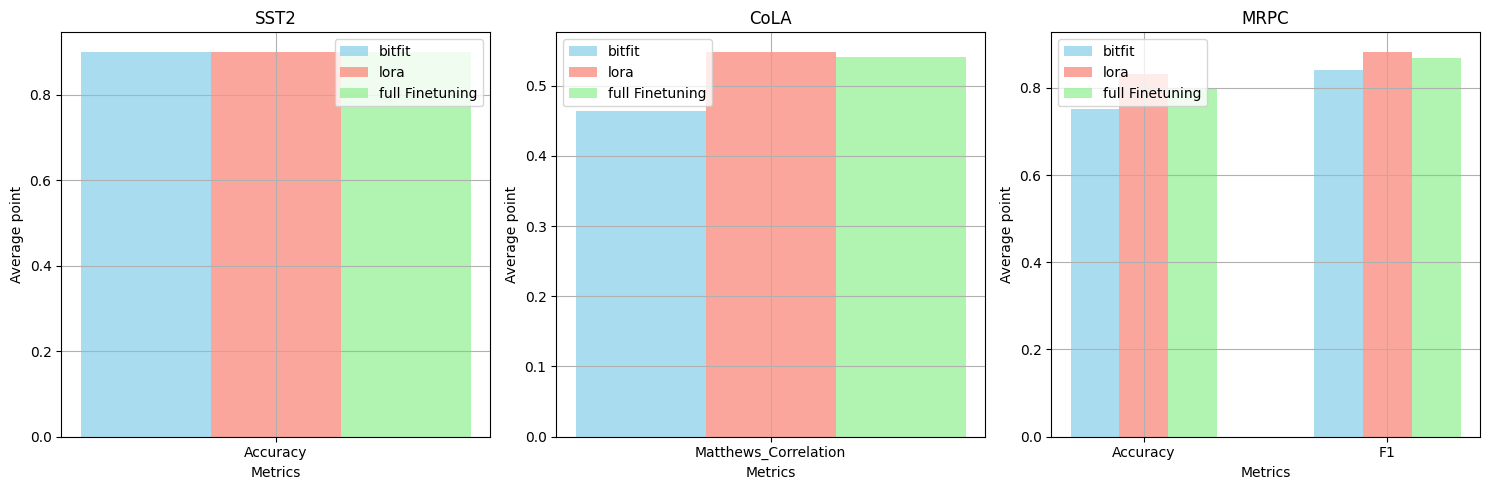

In [5]:
# 繪製柱狀圖
plt.figure(figsize=(15, 5))

# SST2
plt.subplot(1, 3, 1)
bar_width = 0.2
index = range(len(avg_sst2))
plt.bar(index, avg_sst2, bar_width, label='bitfit', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_sst2_r8, bar_width, label='lora', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_sst2_finetune, bar_width, label='full Finetuning', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('SST2')
plt.xticks([i + bar_width for i in index], avg_sst2.index)
plt.legend()
plt.grid(True)

# CoLA
plt.subplot(1, 3, 2)
bar_width = 0.2
index = range(len(avg_cola))
plt.bar(index, avg_cola, bar_width, label='bitfit', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_cola_r8, bar_width, label='lora', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_cola_finetune, bar_width, label='full Finetuning', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('CoLA')
plt.xticks([i + bar_width for i in index], avg_cola.index)
plt.legend()
plt.grid(True)

# MRPC
plt.subplot(1, 3, 3)
bar_width = 0.2
index = range(len(avg_mrpc))
plt.bar(index, avg_mrpc, bar_width, label='bitfit', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_mrpc_r8, bar_width, label='lora', color='salmon', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], avg_mrpc_finetune, bar_width, label='full Finetuning', color='lightgreen', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Average point')
plt.title('MRPC')
plt.xticks([i + bar_width for i in index], avg_mrpc.index)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()